In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import os
import numpy as np
import re
import ast

In [2]:
df = pd.read_csv("results/2025-06-14_20-32-16-ILP.csv")
df

,k,centers,radii,sum_of_radii,data_set
0,1,"[[5.7, 3. , 4.2, 1.2]]",[3.5791060336346563],3.579106,iris.data
1,2,"[[5.6, 3. , 4.1, 1.3], [7.7, 2.6, 6.9, 2.3]]","[3.552463933666323, 0.0]",3.552464,iris.data
2,3,"[[4.3, 3. , 1.1, 0.1], [4.6, 3.6, 1. , 0.2], [...","[0.0, 0.0, 3.465544690232692]",3.465545,iris.data
3,4,"[[4.3, 3. , 1.1, 0.1], [4.6, 3.6, 1. , 0.2], [...","[0.0, 0.0, 3.414674215792775, 0.0]",3.414674,iris.data
4,10,"[[5.7, 4.4, 1.5, 0.4], [5. , 3.5, 1.3, 0.3], [...","[0.0, 0.9539392014169454, 0.0, 0.0, 0.0, 2.032...",2.986179,iris.data
5,100,"[[5.1, 3.5, 1.4, 0.2], [4.9, 3. , 1.4, 0.2], [...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.877496,iris.data
6,1,"[[78., 94.]]",[90.35485598461214],90.354856,ruspini.csv
7,2,"[[74., 96.], [70., 4.]]","[84.52810183601665, 0.0]",84.528102,ruspini.csv
8,3,"[[ 4., 53.], [78., 94.], [70., 4.]]","[0.0, 83.43260753446461, 0.0]",83.432608,ruspini.csv
9,4,"[[ 4., 53.], [78., 94.], [70., 4.], [58., 13.]]","[0.0, 82.00609733428362, 0.0, 0.0]",82.006097,ruspini.csv


In [3]:
result_files = [f for f in os.listdir("./results") if f.endswith('.csv')]
results = []

# clean up weird string representations of arrays
for filename in result_files:
    with open("results/" + filename, "r") as file:
        content = file.read()
    content = content.replace('array(', '')
    content = content.replace(')', '')
    with open("results/" + filename, "w") as file:
        file.write(content)

    df = pd.read_csv("results/" + filename)
    results.append((filename,df))
results

[('2025-06-14_20-32-16-ILP.csv',
        k                                            centers  \
  0     1                             [[5.7, 3. , 4.2, 1.2]]   
  1     2       [[5.6, 3. , 4.1, 1.3], [7.7, 2.6, 6.9, 2.3]]   
  2     3  [[4.3, 3. , 1.1, 0.1], [4.6, 3.6, 1. , 0.2], [...   
  3     4  [[4.3, 3. , 1.1, 0.1], [4.6, 3.6, 1. , 0.2], [...   
  4    10  [[5.7, 4.4, 1.5, 0.4], [5. , 3.5, 1.3, 0.3], [...   
  5   100  [[5.1, 3.5, 1.4, 0.2], [4.9, 3. , 1.4, 0.2], [...   
  6     1                                       [[78., 94.]]   
  7     2                           [[74., 96.], [70.,  4.]]   
  8     3               [[ 4., 53.], [78., 94.], [70.,  4.]]   
  9     4   [[ 4., 53.], [78., 94.], [70.,  4.], [58., 13.]]   
  10   10  [[12., 88.], [19., 65.], [ 46., 142.], [ 86., ...   
  11  100  [[ 4., 53.], [ 5., 63.], [10., 59.], [ 9., 77....   
  
                                                  radii  sum_of_radii  \
  0                                [3.5791060336346563]    

In [4]:
def read(filename):
    points = []

    # lots of basic IO that was very annoying
    with open(filename, 'r') as data:
        for line in data:
            line = line.strip()
            # skip empty lines
            if not line:
                continue
            # split on either comma or space, depending on what is in the file. might break if floats are
            # seperated by commas o.0
            coordinates = re.split(r'[,\s]+', line)

            current_point = []
            for coordinate in coordinates:
                try:
                    current_point.append(float(coordinate))
                except ValueError:
                    continue  # just skip non-numeric elements (so strings)
            # at the end of the line if it's not empty add the point to the data
            if current_point:
                points.append(current_point)

    if points:
        return np.array(points, dtype=float)
    else:
        raise Exception("Input file did not contain numeric points")

ruspini_points = read("data_sets/ruspini.csv")
rl_points = read("data_sets/rl5934.txt")


C:\Users\Mattis\AppData\Local\Temp\ipykernel_8772\1164462870.py:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax[0].scatter(ruspini_points[:,0], ruspini_points[:,1], marker='o', edgecolor="k", cmap='viridis')
C:\Users\Mattis\AppData\Local\Temp\ipykernel_8772\1164462870.py:5: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax[1].scatter(rl_points[:,0], rl_points[:,1], marker='o', edgecolor="k", cmap='plasma')


<function matplotlib.pyplot.show(close=None, block=None)>

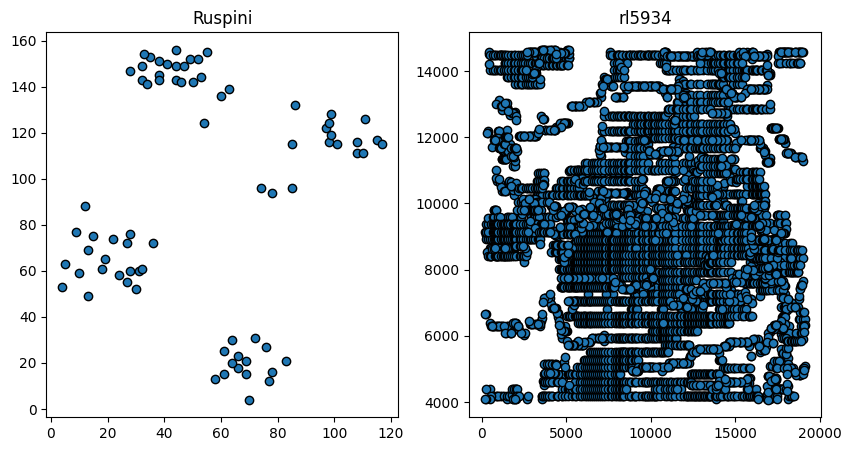

In [5]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax = ax.flatten()
ax[0].scatter(ruspini_points[:,0], ruspini_points[:,1], marker='o', edgecolor="k", cmap='viridis')
ax[0].set_title("Ruspini")
ax[1].scatter(rl_points[:,0], rl_points[:,1], marker='o', edgecolor="k", cmap='plasma')
ax[1].set_title("rl5934")
plt.show

# ILP

In [6]:
ilp_results = results[0][1]
ilp_results

,k,centers,radii,sum_of_radii,data_set
0,1,"[[5.7, 3. , 4.2, 1.2]]",[3.5791060336346563],3.579106,iris.data
1,2,"[[5.6, 3. , 4.1, 1.3], [7.7, 2.6, 6.9, 2.3]]","[3.552463933666323, 0.0]",3.552464,iris.data
2,3,"[[4.3, 3. , 1.1, 0.1], [4.6, 3.6, 1. , 0.2], [...","[0.0, 0.0, 3.465544690232692]",3.465545,iris.data
3,4,"[[4.3, 3. , 1.1, 0.1], [4.6, 3.6, 1. , 0.2], [...","[0.0, 0.0, 3.414674215792775, 0.0]",3.414674,iris.data
4,10,"[[5.7, 4.4, 1.5, 0.4], [5. , 3.5, 1.3, 0.3], [...","[0.0, 0.9539392014169454, 0.0, 0.0, 0.0, 2.032...",2.986179,iris.data
5,100,"[[5.1, 3.5, 1.4, 0.2], [4.9, 3. , 1.4, 0.2], [...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.877496,iris.data
6,1,"[[78., 94.]]",[90.35485598461214],90.354856,ruspini.csv
7,2,"[[74., 96.], [70., 4.]]","[84.52810183601665, 0.0]",84.528102,ruspini.csv
8,3,"[[ 4., 53.], [78., 94.], [70., 4.]]","[0.0, 83.43260753446461, 0.0]",83.432608,ruspini.csv
9,4,"[[ 4., 53.], [78., 94.], [70., 4.], [58., 13.]]","[0.0, 82.00609733428362, 0.0, 0.0]",82.006097,ruspini.csv


In [7]:
ruspini_ilp = ilp_results[ilp_results['data_set']== "ruspini.csv"]
ruspini_ilp

,k,centers,radii,sum_of_radii,data_set
6,1,"[[78., 94.]]",[90.35485598461214],90.354856,ruspini.csv
7,2,"[[74., 96.], [70., 4.]]","[84.52810183601665, 0.0]",84.528102,ruspini.csv
8,3,"[[ 4., 53.], [78., 94.], [70., 4.]]","[0.0, 83.43260753446461, 0.0]",83.432608,ruspini.csv
9,4,"[[ 4., 53.], [78., 94.], [70., 4.], [58., 13.]]","[0.0, 82.00609733428362, 0.0, 0.0]",82.006097,ruspini.csv
10,10,"[[12., 88.], [19., 65.], [ 46., 142.], [ 86., ...","[0.0, 19.209372712298546, 19.697715603592208, ...",68.907088,ruspini.csv
11,100,"[[ 4., 53.], [ 5., 63.], [10., 59.], [ 9., 77....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",62.377675,ruspini.csv


In [8]:
# because of reading from csv weirdness
ruspini_ilp['centers'] = ruspini_ilp['centers'].apply(ast.literal_eval)
ruspini_ilp['radii'] = ruspini_ilp['radii'].apply(ast.literal_eval)

C:\Users\Mattis\AppData\Local\Temp\ipykernel_8772\4043197194.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ruspini_ilp['centers'] = ruspini_ilp['centers'].apply(ast.literal_eval)
C:\Users\Mattis\AppData\Local\Temp\ipykernel_8772\4043197194.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ruspini_ilp['radii'] = ruspini_ilp['radii'].apply(ast.literal_eval)


C:\Users\Mattis\AppData\Local\Temp\ipykernel_8772\508146796.py:15: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax[i].legend()


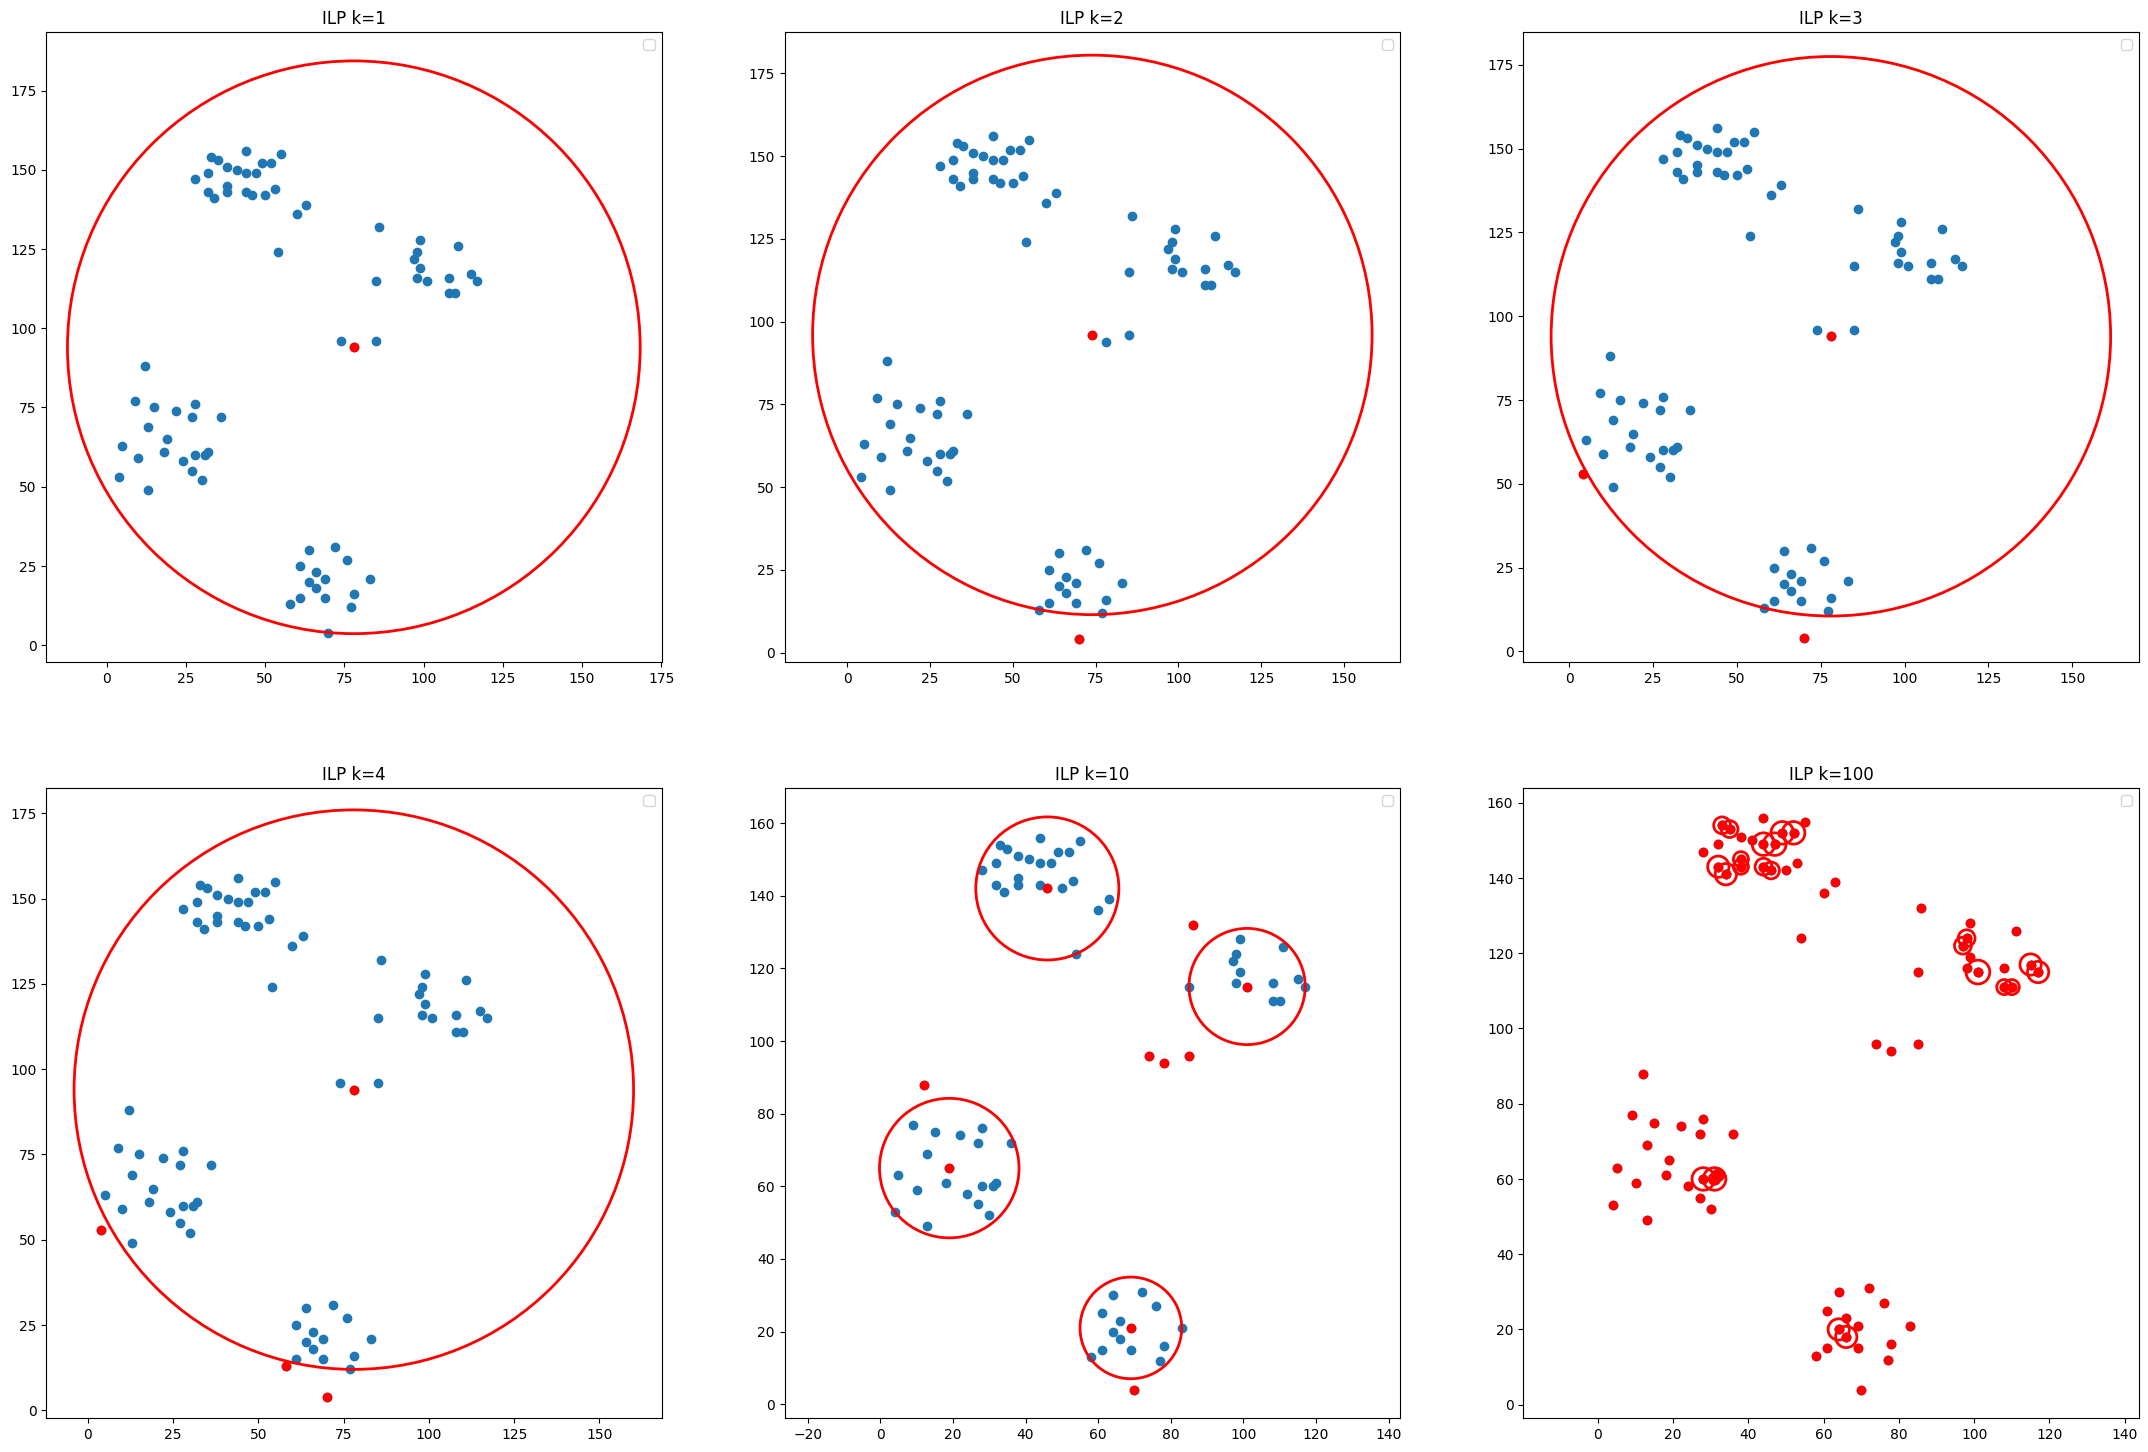

In [9]:
fig, ax = plt.subplots(2,3, figsize=(27,18))
x, y = zip(*ruspini_points)
ax = ax.flatten()
for i in range(len(ruspini_ilp)):
    centers = ruspini_ilp.iloc[i]['centers']
    radii = ruspini_ilp.iloc[i]['radii']
    ax[i].scatter(x, y)
    ax[i].set_title('ILP k=' + str(ruspini_ilp.iloc[i]['k']))
    for center, radius in zip(centers, radii):
        circle = plt.Circle(center, radius, color='red', fill=False, linewidth=2)
        ax[i].add_patch(circle)
        ax[i].plot(*center, 'ro')
    ax[i].set_aspect('equal', adjustable='datalim')
    ax[i].autoscale_view()
    ax[i].legend()
plt.show()

In [10]:
# FPT

In [11]:
FPT_results = results[1][1]
FPT_results

,k,centers,radii,sum_of_radii,data_set
0,1,"[[5.8, 2.7, 4.1, 1. ]]",[6.824754852740136],6.824755,iris.data
1,2,"[[5.6, 3. , 4.5, 1.5], [5.1, 3.5, 1.4, 0.2]]","[4.077973195450468, 0.5825675993500669]",4.660541,iris.data
2,3,"[[6.1, 2.8, 4. , 1.3], [4.3, 3. , 1.1, 0.1], [...","[3.8841293555907455, 0.46422762453665917, 0.46...",4.812585,iris.data
3,1,"[[11600., 11561.]]",[14792.304602166223],14792.304602,rl5934.txt
4,2,"[[11931., 11000.], [ 1488., 14146.]]","[13765.393305727353, 2855.497034527712]",16620.890340,rl5934.txt
5,1,"[[ 50., 142.]]",[159.58388569476557],159.583886,ruspini.csv
6,2,"[[27., 55.], [ 4., 53.]]","[114.27018064547796, 18.80395377710397]",133.074134,ruspini.csv
7,3,"[[78., 94.], [70., 4.], [ 4., 53.]]","[90.73610000000001, 9.996350000000001, 9.99635...",110.728800,ruspini.csv


In [12]:
ruspine_FPT = FPT_results[FPT_results['data_set']== "ruspini.csv"]
ruspine_FPT

,k,centers,radii,sum_of_radii,data_set
5,1,"[[ 50., 142.]]",[159.58388569476557],159.583886,ruspini.csv
6,2,"[[27., 55.], [ 4., 53.]]","[114.27018064547796, 18.80395377710397]",133.074134,ruspini.csv
7,3,"[[78., 94.], [70., 4.], [ 4., 53.]]","[90.73610000000001, 9.996350000000001, 9.99635...",110.728800,ruspini.csv


In [13]:
# because of reading from csv weirdness
ruspine_FPT['centers'] = ruspine_FPT['centers'].apply(ast.literal_eval)
ruspine_FPT['radii'] = ruspine_FPT['radii'].apply(ast.literal_eval)

C:\Users\Mattis\AppData\Local\Temp\ipykernel_8772\583318921.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ruspine_FPT['centers'] = ruspine_FPT['centers'].apply(ast.literal_eval)
C:\Users\Mattis\AppData\Local\Temp\ipykernel_8772\583318921.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ruspine_FPT['radii'] = ruspine_FPT['radii'].apply(ast.literal_eval)


C:\Users\Mattis\AppData\Local\Temp\ipykernel_8772\3826634204.py:15: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax[i].legend()


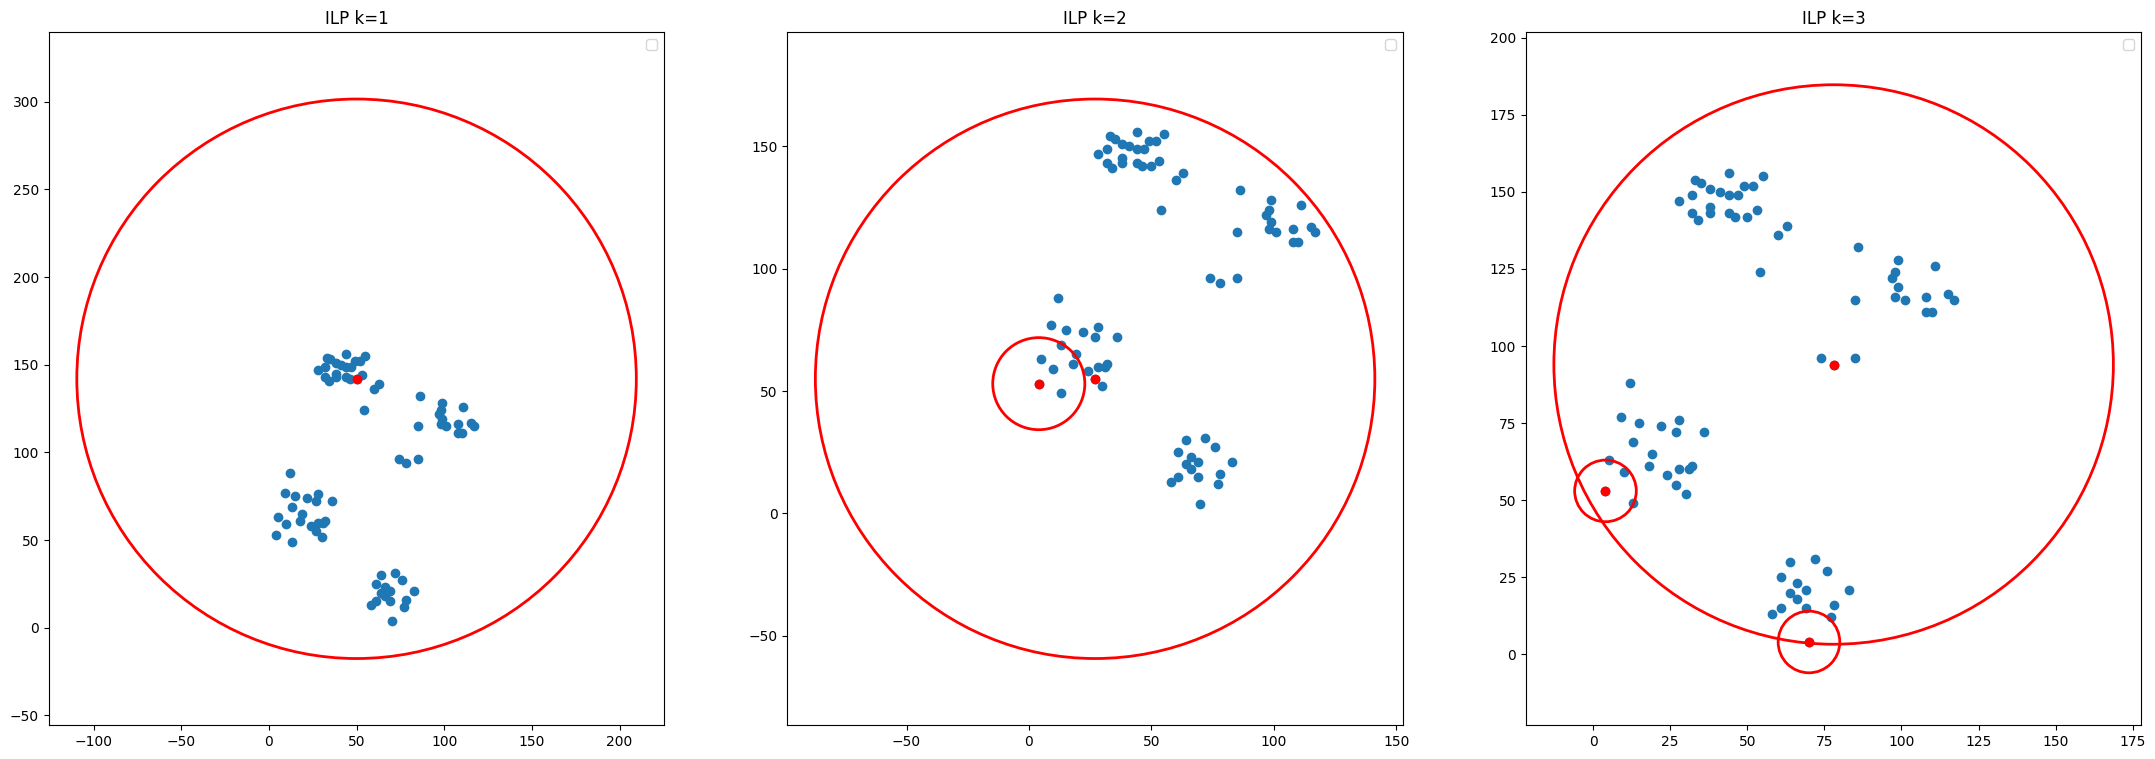

In [14]:
fig, ax = plt.subplots(1,3, figsize=(27,9))
x, y = zip(*ruspini_points)
ax = ax.flatten()
for i in range(len(ruspine_FPT)):
    centers = ruspine_FPT.iloc[i]['centers']
    radii = ruspine_FPT.iloc[i]['radii']
    ax[i].scatter(x, y)
    ax[i].set_title('ILP k=' + str(ruspine_FPT.iloc[i]['k']))
    for center, radius in zip(centers, radii):
        circle = plt.Circle(center, radius, color='red', fill=False, linewidth=2)
        ax[i].add_patch(circle)
        ax[i].plot(*center, 'ro')
    ax[i].set_aspect('equal', adjustable='datalim')
    ax[i].autoscale_view()
    ax[i].legend()
plt.show()